
# Tutorial: Pentingnya Feature Scaling

Selamat datang di salah satu langkah persiapan data yang paling fundamental namun sering disalahpahami: **Feature Scaling**. Di notebook ini, kita akan menjelajahi *mengapa*, *kapan*, dan *bagaimana* kita perlu menyamakan skala fitur-fitur numerik kita.


### 1. Intuisi: Mengapa Skala Berpengaruh?

Bayangkan kita memiliki dataset untuk memprediksi loyalitas pelanggan dengan dua fitur:
1.  **Gaji Tahunan:** Rentang nilainya dari `Rp 50.000.000` hingga `Rp 1.000.000.000`.
2.  **Jumlah Kunjungan per Bulan:** Rentang nilainya dari `1` hingga `20`.

Banyak algoritma *machine learning* bekerja dengan mengukur "jarak" antar titik data atau dengan menyesuaikan "bobot" fitur. Tanpa penskalaan, algoritma akan melihat angka `50.000.000` dan `20`. Secara matematis, perubahan satu unit di Gaji (dari 50.000.000 ke 50.000.001) terlihat sangat kecil, sedangkan perubahan satu unit di Kunjungan (dari 1 ke 2) terlihat sangat besar.

Akibatnya, model akan secara keliru menganggap bahwa **Gaji jauh lebih penting daripada Jumlah Kunjungan**, hanya karena skala angkanya yang lebih besar. Ini dapat menyebabkan model tidak belajar dengan benar.

**Tujuan Feature Scaling:** Menempatkan semua fitur pada "lapangan bermain" yang sama, sehingga tidak ada fitur yang mendominasi hanya karena unit pengukurannya.

### 2. Algoritma Mana yang Membutuhkan Penskalaan?

Tidak semua algoritma terpengaruh oleh skala fitur.

**✅ SANGAT MEMBUTUHKAN PENSKALAAN:**
* **Algoritma berbasis Jarak:** K-Nearest Neighbors (KNN), Support Vector Machines (SVM), K-Means Clustering. Kinerja mereka secara langsung bergantung pada perhitungan jarak antar titik data.
* **Algoritma berbasis Gradient Descent:** Regresi Linear (terutama dengan Regularisasi), Regresi Logistik, Neural Networks. Penskalaan membantu proses *gradient descent* berjalan lebih cepat dan stabil.
  
**❌ TIDAK MEMBUTUHKAN PENSKALAAN:**
* **Algoritma berbasis Pohon:** Decision Trees, Random Forest, Gradient Boosting. Algoritma ini membuat keputusan dengan memecah data pada nilai ambang batas tertentu, sehingga mereka tidak peduli dengan skala absolut dari fitur tersebut.


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [47]:
data = {
    'Usia': [25, 30, 35, 40, 45, 50],
    'Gaji': [50000, 60000, 80000, 120000, 150000, 200000]
}
df = pd.DataFrame(data)
print(df)

   Usia    Gaji
0    25   50000
1    30   60000
2    35   80000
3    40  120000
4    45  150000
5    50  200000


In [48]:
X_train, X_test = train_test_split(df, test_size=0.33, random_state=42)
print(X_train)
print(X_test)

   Usia    Gaji
5    50  200000
2    35   80000
4    45  150000
3    40  120000
   Usia   Gaji
0    25  50000
1    30  60000


#### A. StandardScaler: Standardisasi

**StandardScaler** mengubah data sehingga memiliki **rata-rata (mean) 0** dan **standar deviasi 1**. Ini adalah teknik penskalaan yang paling umum digunakan.

**Rumus:** `z = (x - μ) / σ`
* `x`: Nilai asli
* `μ`: Rata-rata dari kolom
* `σ`: Standar deviasi dari kolom

Ini sangat efektif jika data Anda terdistribusi normal (mengikuti kurva lonceng).

#### jadi saya ceritakan kenapa scaliing itu pakai z-score
jadi misal saya ingin mencari nilai outlier dari ke-2 aspek yang berbeda, nilai ujian vs gaji
1. Nilai Ujian
nilai ujian itu rentangnya dari 0-100, nah misalnya ada 10 data, 9 nya normal, dan 1 nya tidak normal. misal 1 value nilainya 1000. maka kita sebagai manusia tau ohh nilai 1000 ini adalah outliers, ngga masuk akal nih, nilainya ketinggian, masa iya nilai ujian kok nilai nya 1000

2. Gaji
misal anggapan ada list gaji di dekat rumah saya, katakanlah gajinya rentang nya 1 juta - 20 juta, misal dari 20 list gaji, 19 nya normal, dan 1 nya tidak normal, misal di rumah saya ada timothy ronald, yang sebulan bisa menghasilkan 10 miliar. nah kita sebagai manusia langsung paham bahwa timothy ronald ini adalah outlier.

3. KESIMPULANNYA
kita sebagai manusia bisa mengetahui outliers dari aspek yang berbeda, sedangkan mesin tidak mengerti aspek yang sedang dibicarakan, mesin hanya tau nilai angka saja. makanya disini z-score membuat ke-2 aspek tersebut menjadi adil dan bisa dipahami oleh mesin, mesin tau mana nilai yang normal dan mana yang nilainya tidak normal (outliers)


In [1]:
from sklearn.preprocessing import StandardScaler

In [50]:
# 1. inisialisai scaler
scaler_std = StandardScaler()

In [51]:
# 2. Fit hanya data training saja
scaler_std.fit(X_train)

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [52]:
# 3. transformasi data pelatihan dan pengujian
X_train_scaled_std = scaler_std.transform(X_train)
X_test_scaled_std = scaler_std.transform(X_test)

In [53]:
# mengubah kembali ke dataframe
X_train_scaled_std_df = pd.DataFrame(X_train_scaled_std, columns=df.columns)
X_test_scaled_std_df = pd.DataFrame(X_test_scaled_std, columns=df.columns)

print('\n----- Hasil StandardScaler (TRAIN) -----')
print(f'\ndata pelatihan setelah standardisasi:\n{X_train_scaled_std_df}')
print(f'\nrata-rata data yang diskalan:\n{X_train_scaled_std_df.mean()}')
print(f'\nstandar deviasi data yang diskalan:\n{X_train_scaled_std_df.std()}')

print('\n\n----- Hasil StandardScaler (TEST) -----')
print(f'\ndata test setelah standardisasi:\n{X_test_scaled_std_df}')
print(f'\nrata-rata data yang diskalan:\n{X_test_scaled_std_df.mean()}')
print(f'\nstandar deviasi data yang diskalan:\n{X_test_scaled_std_df.std()}')


----- Hasil StandardScaler (TRAIN) -----

data pelatihan setelah standardisasi:
       Usia      Gaji
0  1.341641  1.426825
1 -1.341641 -1.312679
2  0.447214  0.285365
3 -0.447214 -0.399511

rata-rata data yang diskalan:
Usia    0.0
Gaji    0.0
dtype: float64

standar deviasi data yang diskalan:
Usia    1.154701
Gaji    1.154701
dtype: float64


----- Hasil StandardScaler (TEST) -----

data test setelah standardisasi:
       Usia      Gaji
0 -3.130495 -1.997556
1 -2.236068 -1.769263

rata-rata data yang diskalan:
Usia   -2.683282
Gaji   -1.883409
dtype: float64

standar deviasi data yang diskalan:
Usia    0.632456
Gaji    0.161427
dtype: float64


#### B. MinMaxScaler: Normalisasi
**MinMaxScaler** mengubah data sehingga semua nilai berada dalam rentang tertentu, biasanya **antara 0 dan 1**.

**Rumus:** `X_scaled = (x - min) / (max - min)`
* `x`: Nilai asli
* `min`: Nilai minimum dari kolom
* `max`: Nilai maksimum dari kolom

jadi saya ceritakan untuk MinMax ini: intinya adalah kita me convert list value supaya rentangnya menjadi 0 - 1 saja. 

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
# 1. inisialisasi sclaer
scaler_minmax = MinMaxScaler()

In [56]:
# 2. fit hanya pada data pelatihan
scaler_minmax.fit(X_train)

,"feature_range feature_range: tuple (min, max), default=(0, 1)Desired range of transformed data.","(0, ...)"
,"copy copy: bool, default=TrueSet to False to perform inplace row normalization and avoid acopy (if the input is already a numpy array).",True
,"clip clip: bool, default=FalseSet to True to clip transformed values of held-out data toprovided `feature_range`.Since this parameter will clip values, `inverse_transform` may notbe able to restore the original data... note:: Setting `clip=True` does not prevent feature drift (a distribution shift between training and test data). The transformed values are clipped to the `feature_range`, which helps avoid unintended behavior in models sensitive to out-of-range inputs (e.g. linear models). Use with care, as clipping can distort the distribution of test data... versionadded:: 0.24",False


In [57]:
# 3. mentranformasi data pelatihan dan pengujian
X_train_scaled_minmax = scaler_minmax.transform(X_train)
X_test_scaled_minmax = scaler_minmax.transform(X_test)

In [58]:
# mengubah kembali ke dataframe
X_train_scaled_minmax_df = pd.DataFrame(X_train_scaled_minmax, columns=df.columns)
X_test_scaled_minmax_df = pd.DataFrame(X_test_scaled_minmax, columns=df.columns)

print('\n----- Hasil StandardScaler (TRAIN) -----')
print(f'\ndata pelatihan setelah standardisasi:\n{X_train_scaled_minmax_df}')
print(f'\nnilai minimum data yang diskalan:\n{X_train_scaled_minmax_df.min()}')
print(f'\nnilai maximum data yang diskalan:\n{X_train_scaled_minmax_df.max()}')

print('\n\n----- Hasil StandardScaler (TEST) -----')
print(f'\ndata pelatihan setelah standardisasi:\n{X_test_scaled_minmax_df}')
print(f'\nnilai minimum data yang diskalan:\n{X_test_scaled_minmax_df.min()}')
print(f'\nnilai maximum data yang diskalan:\n{X_test_scaled_minmax_df.max()}')


----- Hasil StandardScaler (TRAIN) -----

data pelatihan setelah standardisasi:
       Usia      Gaji
0  1.000000  1.000000
1  0.000000  0.000000
2  0.666667  0.583333
3  0.333333  0.333333

nilai minimum data yang diskalan:
Usia    0.0
Gaji    0.0
dtype: float64

nilai maximum data yang diskalan:
Usia    1.0
Gaji    1.0
dtype: float64


----- Hasil StandardScaler (TEST) -----

data pelatihan setelah standardisasi:
       Usia      Gaji
0 -0.666667 -0.250000
1 -0.333333 -0.166667

nilai minimum data yang diskalan:
Usia   -0.666667
Gaji   -0.250000
dtype: float64

nilai maximum data yang diskalan:
Usia   -0.333333
Gaji   -0.166667
dtype: float64


### 4. Visualisasi Efek Penskalaan

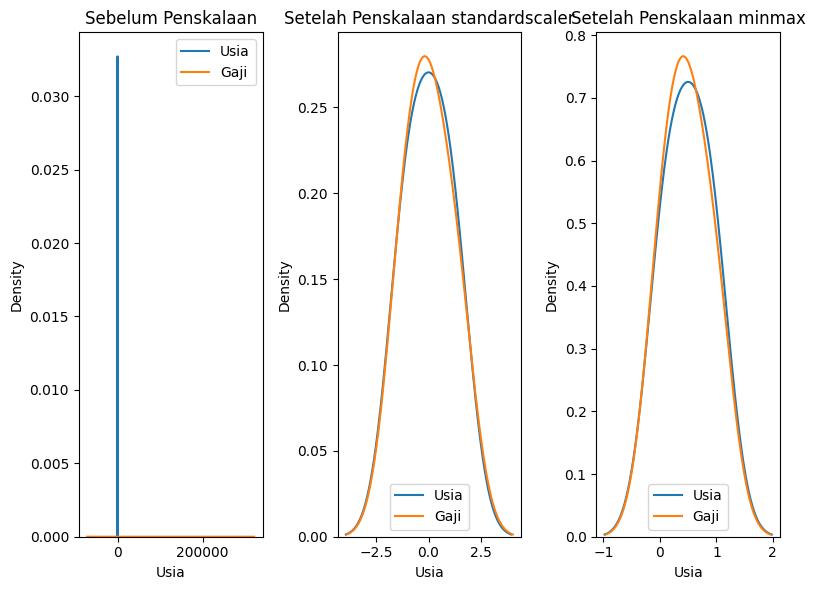

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

fix, axes = plt.subplots(1,3,figsize=(8,6))

# plot data asli
sns.kdeplot(data=df['Usia'], ax=axes[0], label='Usia')
sns.kdeplot(data=df['Gaji'], ax=axes[0], label='Gaji')
axes[0].set_title('Sebelum Penskalaan')
axes[0].legend()

# plot data standard
sns.kdeplot(data=X_train_scaled_std_df['Usia'], ax=axes[1], label='Usia')
sns.kdeplot(data=X_train_scaled_std_df['Gaji'], ax=axes[1], label='Gaji')
axes[1].set_title('Setelah Penskalaan standardscaler')
axes[1].legend()

# plot data asli
sns.kdeplot(data=X_train_scaled_minmax_df['Usia'], ax=axes[2], label='Usia')
sns.kdeplot(data=X_train_scaled_minmax_df['Gaji'], ax=axes[2], label='Gaji')
axes[2].set_title('Setelah Penskalaan minmax')
axes[2].legend()

plt.tight_layout()
plt.show()